In [ ]:

from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade gspread gspread-dataframe scikit-learn --quiet

# 라이브러리 불러오기
import pandas as pd
import gspread
from google.colab import drive
from google.oauth2.service_account import Credentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 구글 드라이브 마운트
drive.mount('/content/drive', force_remount=True)

# 2. 인증 파일
json_keyfile_path = "/content/drive/My Drive/Key/credentials.json"
scopes = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
credentials = Credentials.from_service_account_file(json_keyfile_path, scopes=scopes)
gc = gspread.authorize(credentials)

# 3. 스프레드시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15oaGikPi08J_uF4k1PShd_jztIuOB6V1lbXOy9-s8mw/edit"
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet("분석2")

# 4. 데이터 불러오기 + 컬럼명 확인
df = get_as_dataframe(worksheet)
print("컬럼 이름 확인:", df.columns.tolist())

Mounted at /content/drive
컬럼 이름 확인: ['NO', '관리지사', '실적채널', '계약번호', '구역담당', '① 신청사유_VOC', '② 현장결과', '③ 현상태', 'ㅇㅇ', '상호', 'KTT월정료', '정지시작일자', '정지종료일자', '정지일수', '방문결과', '방문처리요약', '처리요약', '지사확인', '정지일수(3월10일)', '장비상태(현장확인)', 'cctv자체사용', '관제전산 특이사항', 'Unnamed: 22', '합친문장', '클러스터', '해지여부']


In [ ]:
!pip install --upgrade gspread gspread-dataframe scikit-learn --quiet

import pandas as pd
import gspread
from google.colab import drive
from google.oauth2.service_account import Credentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 구글 드라이브 마운트
drive.mount('/content/drive', force_remount=True)

# 2. 인증 설정
json_keyfile_path = "/content/drive/My Drive/Key/credentials.json"
scopes = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
credentials = Credentials.from_service_account_file(json_keyfile_path, scopes=scopes)
gc = gspread.authorize(credentials)

# 3. 구글 시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15oaGikPi08J_uF4k1PShd_jztIuOB6V1lbXOy9-s8mw/edit"
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet("분석2")

# 4. 시트 데이터 가져오기
df = get_as_dataframe(worksheet)

# 5. 세 컬럼 합치기 (공백으로 연결)
df = df.dropna(subset=['① 신청사유_VOC', '② 현장결과', '③ 현상태'])
df['합친문장'] = df['① 신청사유_VOC'].astype(str) + ' ' + df['② 현장결과'].astype(str) + ' ' + df['③ 현상태'].astype(str)

# 6. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['합친문장'])

# 7. KMeans 클러스터링 (예: 4개 그룹)
kmeans = KMeans(n_clusters=4, random_state=42)
df['클러스터'] = kmeans.fit_predict(X)

# 8. 결과 시트에 다시 저장
worksheet.clear()
set_with_dataframe(worksheet, df)

Mounted at /content/drive


In [ ]:
!pip install --upgrade gspread gspread-dataframe google-auth --quiet

import gspread
from google.colab import auth
import pandas as pd
from google.auth.transport.requests import Request
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# 1. 사용자 인증
auth.authenticate_user()

# 2. 현재 로그인된 사용자 인증 정보 불러오기
creds, _ = default()
creds.refresh(Request())  # 인증 갱신

# 3. gspread에 사용자 인증 연동
gc = gspread.authorize(creds)

# 4. 구글 시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15oaGikPi08J_uF4k1PShd_jztIuOB6V1lbXOy9-s8mw/edit"
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet("분석2")

# 5. 데이터 가져오기
df = get_as_dataframe(worksheet)
print("✅ 컬럼명 확인:", df.columns.tolist())

✅ 컬럼명 확인: ['NO', '관리지사', '실적채널', '계약번호', '구역담당', '① 신청사유_VOC', '② 현장결과', '③ 현상태', 'ㅇㅇ', '상호', 'KTT월정료', '정지시작일자', '정지종료일자', '정지일수', '방문결과', '방문처리요약', '처리요약', '지사확인', '정지일수(3월10일)', '장비상태(현장확인)', 'cctv자체사용', '관제전산 특이사항', 'Unnamed: 22', '합친문장', '클러스터', '해지여부']


In [ ]:
!pip install --upgrade gspread gspread-dataframe scikit-learn --quiet

import pandas as pd
import gspread
from google.colab import auth
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.auth.transport.requests import Request
from google.auth import default
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 사용자 인증
auth.authenticate_user()
creds, _ = default()
creds.refresh(Request())
gc = gspread.authorize(creds)

# 2. 구글 시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15oaGikPi08J_uF4k1PShd_jztIuOB6V1lbXOy9-s8mw/edit"
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet("분석2")

# 3. 데이터프레임으로 불러오기
df = get_as_dataframe(worksheet)

# 4. 필요한 컬럼만 추출 후 합치기
df = df.dropna(subset=['① 신청사유_VOC', '② 현장결과', '③ 현상태'])
df['합친문장'] = df['① 신청사유_VOC'].astype(str) + ' ' + df['② 현장결과'].astype(str) + ' ' + df['③ 현상태'].astype(str)

# 5. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['합친문장'])

# 6. KMeans 군집화 (그룹 수는 4로 설정, 필요시 조절 가능)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['클러스터'] = kmeans.fit_predict(X)

# 7. 시트에 다시 저장
set_with_dataframe(worksheet, df)

In [ ]:
!pip install --upgrade gspread gspread-dataframe scikit-learn --quiet

import pandas as pd
import gspread
from google.colab import auth
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.auth.transport.requests import Request
from google.auth import default
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 사용자 인증
auth.authenticate_user()
creds, _ = default()
creds.refresh(Request())
gc = gspread.authorize(creds)

# 2. 구글 시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15oaGikPi08J_uF4k1PShd_jztIuOB6V1lbXOy9-s8mw/edit"
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet("분석2")

# 3. 데이터프레임으로 불러오기
df = get_as_dataframe(worksheet)

# 4. 두 컬럼만 사용하여 합치기
df = df.dropna(subset=['① 신청사유_VOC', '② 현장결과'])
df['합친문장'] = df['① 신청사유_VOC'].astype(str) + ' ' + df['② 현장결과'].astype(str)

# 5. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['합친문장'])

# 6. KMeans 클러스터링 (클러스터 수: 4, 필요 시 조정 가능)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['클러스터'] = kmeans.fit_predict(X)

# 7. 결과 시트에 저장
set_with_dataframe(worksheet, df)

In [ ]:
# ✅ 정렬을 위한 전체 코드 이어서 실행

# 이미 인증 및 데이터 로딩 완료된 상태에서 이어서 실행 가능

# 1. 시트에서 다시 데이터 불러오기
df = get_as_dataframe(worksheet)

# 2. '클러스터' 컬럼이 있는지 확인하고 정렬
if '클러스터' in df.columns:
    df_sorted = df.sort_values(by='클러스터', ascending=True)

    # 3. 시트에 다시 저장
    worksheet.clear()
    set_with_dataframe(worksheet, df_sorted)
    print("✅ 클러스터 기준으로 정렬 완료되었습니다!")
else:
    print("⚠️ '클러스터' 컬럼이 존재하지 않습니다. 먼저 클러스터링을 수행해주세요.")

✅ 클러스터 기준으로 정렬 완료되었습니다!


In [ ]:

# 1. 시트에서 데이터 다시 불러오기
df = get_as_dataframe(worksheet)

# 2. '② 현장결과'에서 '해지' 포함 여부 체크 → '해지여부' 컬럼 생성
df['해지여부'] = df['② 현장결과'].astype(str).apply(lambda x: '해지' if '해지' in x else '정상')

# 3. '클러스터'와 '해지여부'를 기준으로 정렬
if '클러스터' in df.columns:
    df = df.sort_values(by='클러스터')

# 4. 시트에 다시 저장
worksheet.clear()
set_with_dataframe(worksheet, df)

print("✅ '해지여부' 컬럼이 추가되고 클러스터 기준으로 정렬되었습니다!")


✅ '해지여부' 컬럼이 추가되고 클러스터 기준으로 정렬되었습니다!


In [ ]:
# 1. 시트에서 최신 데이터 불러오기
df = get_as_dataframe(worksheet)

# 2. '해지여부'별 건수 계산
해지_집계 = df['해지여부'].value_counts().reset_index()
해지_집계.columns = ['해지여부', '건수']

# 3. 점유율(%) 계산
총건수 = 해지_집계['건수'].sum()
해지_집계['점유율(%)'] = (해지_집계['건수'] / 총건수 * 100).round(1)

# 4. 결과 출력
print("✅ 해지 여부별 건수 및 점유율:")
print(해지_집계)

✅ 해지 여부별 건수 및 점유율:
  해지여부  건수  점유율(%)
0   해지  35    68.6
1   정상  16    31.4


In [ ]:
# 기본 정보 확인
print("✅ 데이터 행 수:", len(df))
print("✅ 컬럼 목록:", df.columns.tolist())
print("✅ 결측값 현황:")
print(df.isnull().sum())

✅ 데이터 행 수: 51
✅ 컬럼 목록: ['NO', '관리지사', '실적채널', '계약번호', '구역담당', '① 신청사유_VOC', '② 현장결과', '③ 현상태', 'ㅇㅇ', '상호', 'KTT월정료', '정지시작일자', '정지종료일자', '정지일수', '방문결과', '방문처리요약', '처리요약', '지사확인', '정지일수(3월10일)', '장비상태(현장확인)', 'cctv자체사용', '관제전산 특이사항', 'Unnamed: 22', '합친문장', '클러스터', '해지여부']
✅ 결측값 현황:
NO              0
관리지사            0
실적채널            0
계약번호            0
구역담당            0
① 신청사유_VOC      0
② 현장결과          0
③ 현상태           0
ㅇㅇ             44
상호              0
KTT월정료          0
정지시작일자          0
정지종료일자          0
정지일수            0
방문결과            0
방문처리요약          0
처리요약            0
지사확인           19
정지일수(3월10일)     0
장비상태(현장확인)     11
cctv자체사용       41
관제전산 특이사항      46
Unnamed: 22    21
합친문장            0
클러스터            0
해지여부            0
dtype: int64


In [ ]:
# 해지 / 정상 분포
해지_집계 = df['해지여부'].value_counts().reset_index()
해지_집계.columns = ['해지여부', '건수']
해지_집계['점유율(%)'] = (해지_집계['건수'] / 해지_집계['건수'].sum() * 100).round(1)

print("\n📊 해지여부 분포")
print(해지_집계)


📊 해지여부 분포
  해지여부  건수  점유율(%)
0   해지  35    68.6
1   정상  16    31.4


In [ ]:
# 클러스터별 해지여부 교차표
클러스터_분석 = pd.crosstab(df['클러스터'], df['해지여부'], margins=True)
클러스터_비율 = pd.crosstab(df['클러스터'], df['해지여부'], normalize='index').round(2) * 100

print("\n📌 클러스터별 해지 건수")
print(클러스터_분석)

print("\n📌 클러스터별 해지 점유율 (%)")
print(클러스터_비율)


📌 클러스터별 해지 건수
해지여부  정상  해지  All
클러스터             
0.0    1   6    7
1.0   11  23   34
2.0    4   5    9
3.0    0   1    1
All   16  35   51

📌 클러스터별 해지 점유율 (%)
해지여부    정상     해지
클러스터             
0.0   14.0   86.0
1.0   32.0   68.0
2.0   44.0   56.0
3.0    0.0  100.0


In [ ]:
top_결과 = df['② 현장결과'].value_counts().head(10)
print("\n🏷️ 자주 등장한 현장결과 TOP 10:")
print(top_결과)


🏷️ 자주 등장한 현장결과 TOP 10:
② 현장결과
폐문_체납_미납시직권해지       7
정상사용_해지후신규로 해지대상    6
타사설치_해지예정           2
정상영업_해지대상           2
폐문_부활               2
비어있음_해지예정           2
폐문_해지               2
건물매도_해지예정           1
정상사용_부활             1
매장비어있음_복구불가_해지예정    1
Name: count, dtype: int64


In [ ]:
# ✅ 한글 폰트 설치 (Colab 전용, 한 번만 실행하면 됨)
!apt-get -qq install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# ✅ 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

print("✅ 나눔고딕 폰트 설정 완료! 이제 한글이 잘 나올 거예요 😊")

Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 나눔고딕 폰트 설정 완료! 이제 한글이 잘 나올 거예요 😊


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

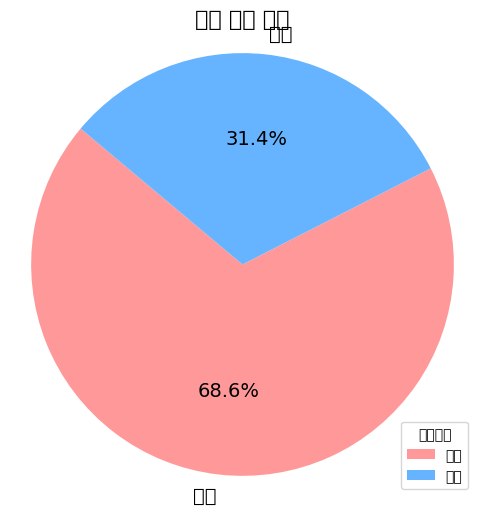

In [ ]:
해지_집계 = df['해지여부'].value_counts()
labels = 해지_집계.index.tolist()
sizes = 해지_집계.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('해지 여부 분포', fontsize=16)
plt.legend(labels, title='해지여부', loc='lower right')
plt.axis('equal')
plt.show()

In [ ]:
# 나눔 폰트 설치
!apt-get -qq install -y fonts-nanum

# 런타임에 새로 적용되도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 설치된 나눔폰트 목록 확인
font_paths = [f.fname for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("📌 설치된 나눔 폰트 경로:", font_paths)

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 음수(-) 깨짐 방지
print("✅ 나눔고딕 폰트 설정 완료!")

📌 설치된 나눔 폰트 경로: []
✅ 나눔고딕 폰트 설정 완료!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

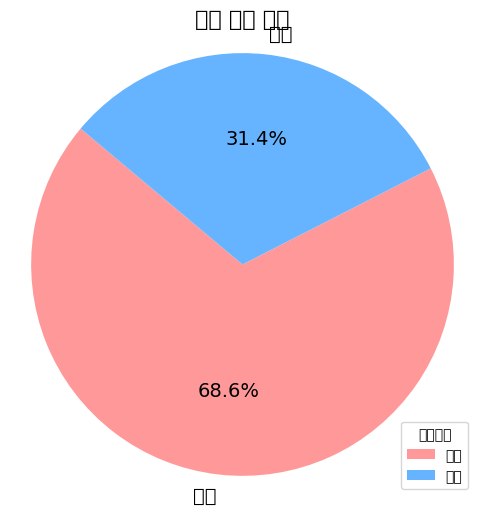

In [ ]:
해지_집계 = df['해지여부'].value_counts()
labels = 해지_집계.index.tolist()
sizes = 해지_집계.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('해지 여부 분포', fontsize=16)
plt.legend(labels, title='해지여부', loc='lower right')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

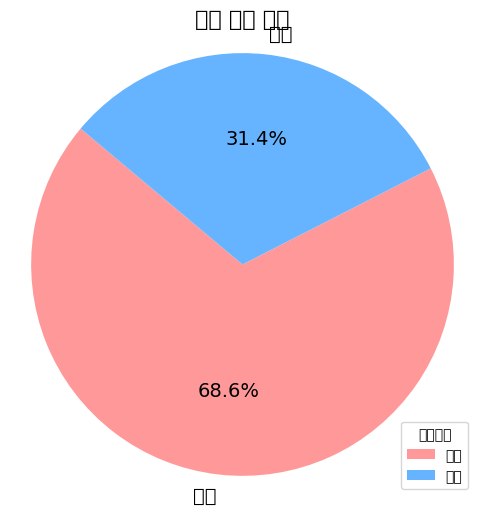

In [ ]:
import matplotlib.pyplot as plt

# ✅ 한글 폰트 설정 (Colab에 설치된 기본 폰트 활용)
plt.rcParams['font.family'] = 'AppleGothic' if 'AppleGothic' in plt.rcParams['font.family'] else 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 📊 해지여부 분포
해지_집계 = df['해지여부'].value_counts()
labels = 해지_집계.index.tolist()
sizes = 해지_집계.values
colors = ['#ff9999','#66b3ff']

# 파이차트
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('해지 여부 분포', fontsize=16)
plt.legend(labels, title='해지여부', loc='lower right')
plt.axis('equal')  # 동그란 원 유지
plt.show()

<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-98316d807c6d>:11: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

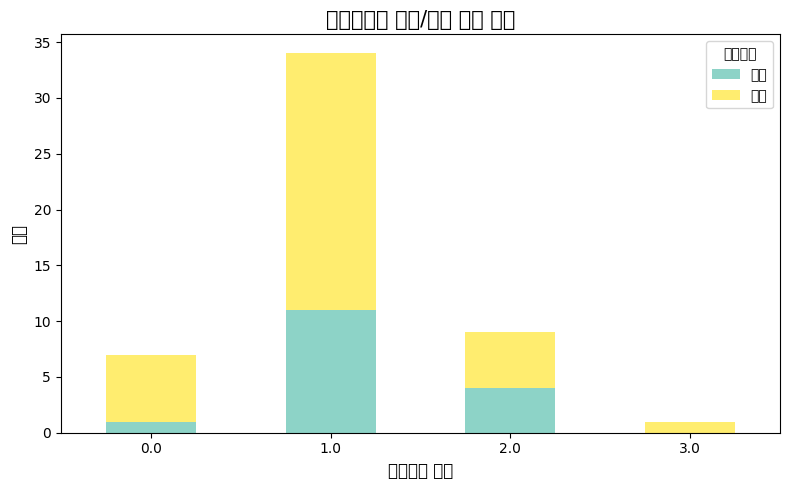

In [ ]:
# 클러스터별 해지 건수
cluster_counts = pd.crosstab(df['클러스터'], df['해지여부'])

# 막대그래프 그리기
cluster_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set3')
plt.title('클러스터별 해지/정상 건수 분포', fontsize=15)
plt.xlabel('클러스터 번호', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='해지여부', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# ✅ 나눔고딕 폰트 설치
!apt-get -qq install -y fonts-nanum

# ✅ 런타임에 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# ✅ 나눔고딕으로 폰트 강제 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

print(f"✅ 한글 폰트 적용 완료: {font_name}")


✅ 한글 폰트 적용 완료: NanumGothic


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

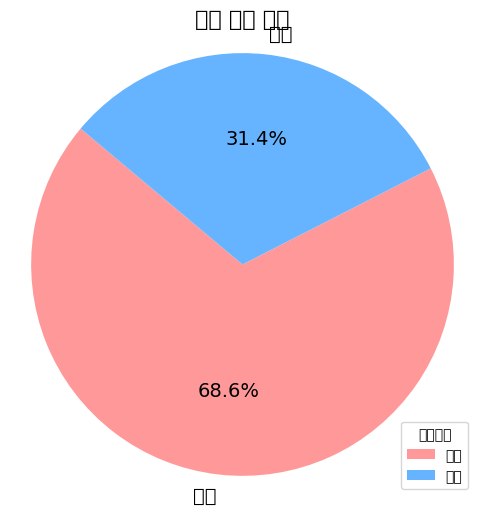

In [ ]:
# 📊 파이 차트 예시
해지_집계 = df['해지여부'].value_counts()
labels = 해지_집계.index.tolist()
sizes = 해지_집계.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('해지 여부 분포', fontsize=16)
plt.legend(labels, title='해지여부', loc='lower right')
plt.axis('equal')
plt.show()

In [ ]:
# 🔸 한글 폰트 설치
!apt-get -qq install -y fonts-nanum

# 🔸 런타임에 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 🔸 설치된 나눔고딕 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False  # 음수(-) 깨짐 방지

print(f"✅ 한글 폰트 적용 완료: {font_name}")

✅ 한글 폰트 적용 완료: NanumGothic


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

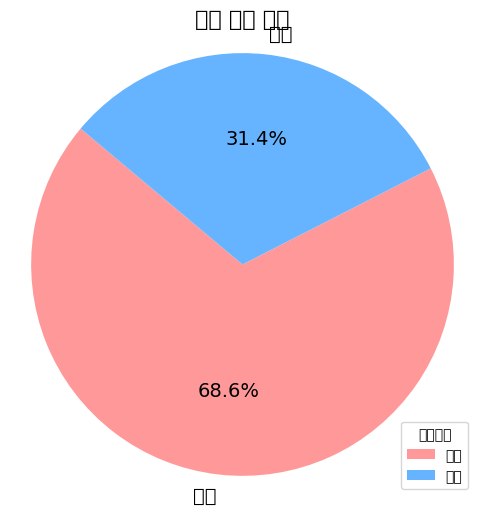

In [ ]:
# 📊 해지여부 파이차트 예시
해지_집계 = df['해지여부'].value_counts()
labels = 해지_집계.index.tolist()
sizes = 해지_집계.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%',
    startangle=140, colors=colors,
    textprops={'fontsize': 14}
)
plt.title('해지 여부 분포', fontsize=16)
plt.legend(labels, title='해지여부', loc='lower right')
plt.axis('equal')
plt.show()